In [41]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import os
from dotenv import load_dotenv
from GcopterFormatter import GcopterFormatter
from RmaderFormatter import RmaderFormatter
import re
load_dotenv()


True

In [42]:
# please create a .env file with PREFIXPATH=your_path_to_GcopterRmaderIntegration_
gcopterlogs = os.listdir(os.path.join(str(os.getenv("PREFIXPATH")), "benchmarkingLogs/gcopterlog"))
rmaderlogs = os.listdir(os.path.join(str(os.getenv("PREFIXPATH")), "benchmarkingLogs/rmaderlog"))

# print(gcopterlogs)
print(rmaderlogs)

gcopterlogs = sorted(gcopterlogs, key=lambda x:int(re.findall(r'[0-9]+', x)[0])) # sort before pushing to dataframe
rmaderlogs = sorted(rmaderlogs, key=lambda x:int(re.findall(r'[0-9]+', x)[0])) # sort before pushing to dataframe

# print(gcopterlogs)
print(rmaderlogs)

['rmader_1000_0.12.txt', 'rmader_700_0.12.txt', 'rmader_16_0.08.txt', 'rmader_300_0.1.txt', 'rmader_1500_0.12.txt', 'rmader_500_0.1.txt', 'rmader_1200_0.12.txt', 'rmader_150_0.1.txt', 'rmader_200_0.1.txt', 'rmader_800_0.12.txt', 'rmader_400_0.1.txt', 'rmader_5_0.075.txt', 'rmader_40_0.09.txt', 'rmader_1400_0.12.txt', 'rmader_100_0.1.txt', 'rmader_20_0.08.txt', 'rmader_1100_0.12.txt', 'rmader_600_0.12.txt', 'rmader_80_0.09.txt', 'rmader_1300_0.12.txt', 'rmader_900_0.12.txt']
['rmader_5_0.075.txt', 'rmader_16_0.08.txt', 'rmader_20_0.08.txt', 'rmader_40_0.09.txt', 'rmader_80_0.09.txt', 'rmader_100_0.1.txt', 'rmader_150_0.1.txt', 'rmader_200_0.1.txt', 'rmader_300_0.1.txt', 'rmader_400_0.1.txt', 'rmader_500_0.1.txt', 'rmader_600_0.12.txt', 'rmader_700_0.12.txt', 'rmader_800_0.12.txt', 'rmader_900_0.12.txt', 'rmader_1000_0.12.txt', 'rmader_1100_0.12.txt', 'rmader_1200_0.12.txt', 'rmader_1300_0.12.txt', 'rmader_1400_0.12.txt', 'rmader_1500_0.12.txt']


#### GCopter data processing

In [43]:

# print(os.getenv('PREFIXPATH'))


gf = GcopterFormatter(os.path.join(str(os.getenv('PREFIXPATH')), "DOESNTMATTER,JUSTFORINIT"))

gcopterdict = {}
gcopterdict_noOutlier = {}

path = os.path.join(str(os.getenv('PREFIXPATH')), "benchmarkingLogs/gcopterlog/")

for file in gcopterlogs:
    gf.changeFilePath(path+file)
    gcopterdict["n="+re.findall(r'[0-9]+', file)[0]] = gf.format()
    gcopterdict_noOutlier["n="+re.findall(r'[0-9]+', file)[0]] = gf.removeOutliers()

# print(gcopterdict)
    


gcopterdf = pd.DataFrame(gcopterdict)
gcopterdf_noOutlier = pd.DataFrame(gcopterdict_noOutlier)
# print(gcopterdf)

RMADER Data Processing

In [44]:

# print(os.getenv('PREFIXPATH'))


rf = RmaderFormatter(os.path.join(str(os.getenv('PREFIXPATH')), "DOESNTMATTER,JUSTFORINIT"))

rmaderdict = {}
rmaderdict_noOutlier = {}

path = os.path.join(str(os.getenv('PREFIXPATH')), "benchmarkingLogs/rmaderlog/")

for file in rmaderlogs:
    rf.changeFilePath(path+file)
    rmaderdict["n="+re.findall(r'[0-9]+', file)[0]] = rf.format()
    rmaderdict_noOutlier["n="+re.findall(r'[0-9]+', file)[0]] = rf.removeOutliers()

# print(gcopterdict)
    


rmaderdf = pd.DataFrame(rmaderdict)
rmaderdf_noOutlier = pd.DataFrame(rmaderdict_noOutlier)
print(rmaderdf)

          n=5        n=16        n=20       n=40      n=80     n=100  \
0   95.876950   99.448750   98.018220  105.55600  107.1037  120.9952   
1   89.673340  100.027700   98.313690  106.16590  112.4471  123.5086   
2   90.241710   95.533520   95.773780  104.97240  108.7151  121.5500   
3   90.212760  101.301200   98.974270  106.87950  108.6249  120.3743   
4   93.607490   96.836240   97.309350  105.89120  108.4542  124.6315   
5   92.858640   95.996000  103.179900  106.64380  106.4248  126.9989   
6   92.632670   96.929430   96.932300  107.81430  107.3698  120.3398   
7   92.305780   96.655390   99.937580  110.07160  107.6736  123.1509   
8   91.471720   96.155600   99.220420  112.31280  109.0696  122.7065   
9   91.958680  100.369100   98.833880  108.09550  110.5377  116.6569   
10  90.300910   97.863170  100.408500  106.87900  106.5007  117.1962   
11  96.553010   99.504380   96.600450  106.57560  106.8163  118.1315   
12  95.877190   97.950070  100.453400  105.56130  107.4861  123.

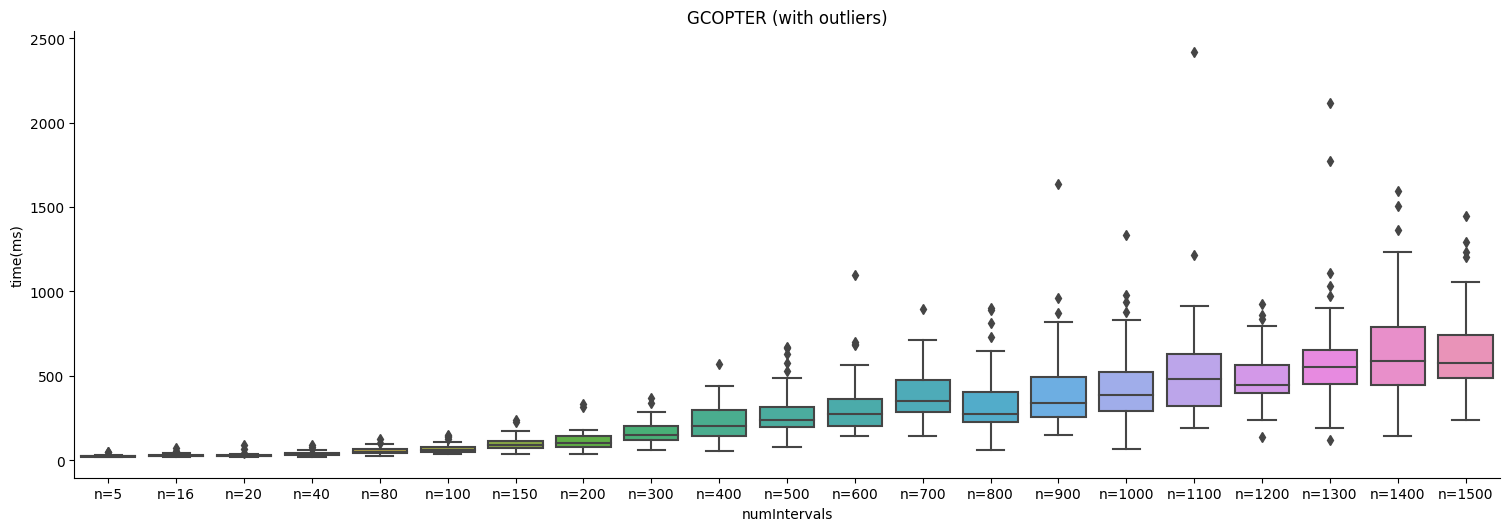

In [45]:
sns.catplot(data=gcopterdf, kind='box', height=5, aspect=3).set(title="GCOPTER (with outliers)", ylabel="time(ms)", xlabel="numIntervals")

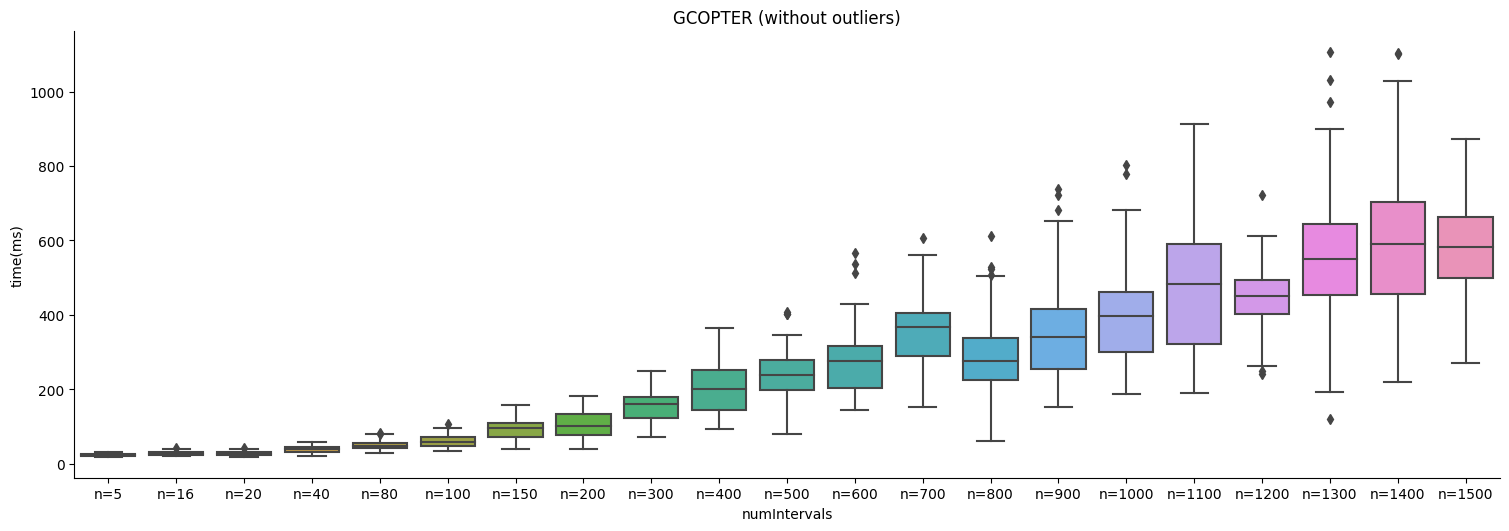

In [46]:
sns.catplot(data=gcopterdf_noOutlier, kind='box', height=5, aspect=3).set(title="GCOPTER (without outliers)", ylabel="time(ms)", xlabel="numIntervals")

In [47]:
# get rsd for gcopter
print("Number of Intervals \t Relative Standard Deviation (RSD)")
for column in gcopterdf_noOutlier:
    print(column, end="\t\t\t\t")
    rsd = gcopterdf_noOutlier[column].std()/gcopterdf_noOutlier[column].mean() * 100
    print(round(rsd,5), end="")
    print("%")




Number of Intervals 	 Relative Standard Deviation (RSD)
n=5				17.02718%
n=16				18.35594%
n=20				19.46572%
n=40				22.02272%
n=80				26.35988%
n=100				27.91648%
n=150				30.23426%
n=200				35.65929%
n=300				29.58138%
n=400				35.75421%
n=500				30.31141%
n=600				35.11659%
n=700				30.60388%
n=800				39.11592%
n=900				39.16518%
n=1000				33.44653%
n=1100				36.19815%
n=1200				22.89471%
n=1300				36.87216%
n=1400				33.95461%
n=1500				23.69939%


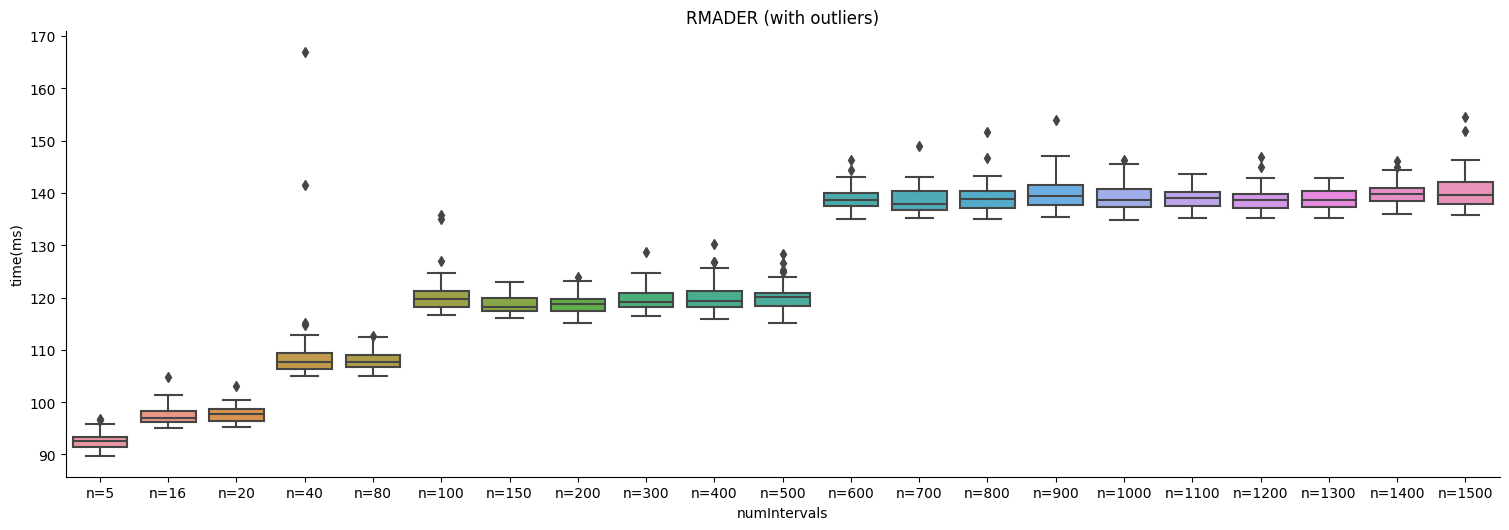

In [48]:
sns.catplot(data=rmaderdf, kind='box', height=5, aspect=3).set(title="RMADER (with outliers)", ylabel="time(ms)", xlabel="numIntervals")

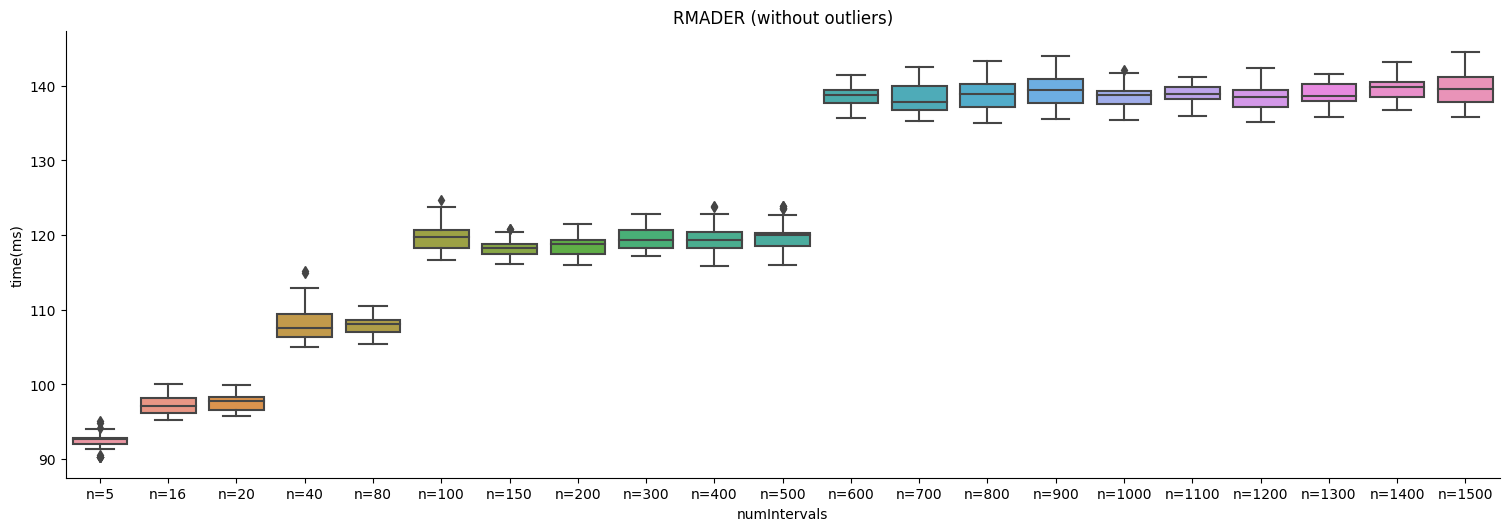

In [49]:
sns.catplot(data=rmaderdf_noOutlier, kind='box', height=5, aspect=3).set(title="RMADER (without outliers)", ylabel="time(ms)", xlabel="numIntervals")

In [50]:
# get rsd for RMADER
print("Number of Intervals \t Relative Standard Deviation (RSD)")
for column in rmaderdf_noOutlier:
    print(column, end="\t\t\t\t")
    rsd = rmaderdf_noOutlier[column].std()/rmaderdf_noOutlier[column].mean() * 100
    print(round(rsd,5), end="")
    print("%")


Number of Intervals 	 Relative Standard Deviation (RSD)
n=5				1.15931%
n=16				1.33893%
n=20				1.11044%
n=40				2.17644%
n=80				1.15648%
n=100				1.65002%
n=150				0.98936%
n=200				1.13229%
n=300				1.21507%
n=400				1.65573%
n=500				1.66717%
n=600				1.06317%
n=700				1.47591%
n=800				1.46782%
n=900				1.51162%
n=1000				1.18587%
n=1100				0.94887%
n=1200				1.35075%
n=1300				1.04304%
n=1400				1.10956%
n=1500				1.61161%


In [60]:

gcopterdf_noOutlier['algo'] = ['gcopter'] * 51
rmaderdf_noOutlier['algo'] = ['rmader'] * 52

# gcopterdf_noOutlier
# rmaderdf_noOutlier

combineddf = gcopterdf_noOutlier.append(rmaderdf_noOutlier, ignore_index=True)
combineddf

,n=5,n=16,n=20,n=40,n=80,n=100,n=150,n=200,n=300,n=400,...,n=700,n=800,n=900,n=1000,n=1100,n=1200,n=1300,n=1400,n=1500,algo
0,19.199200,23.955800,19.453600,41.32310,40.873700,43.284300,109.526000,181.103000,217.954000,141.131000,...,372.401000,187.125000,493.521000,488.377000,482.572000,559.517000,1030.830000,1100.880000,413.11400,gcopter
1,28.791700,32.090700,27.836100,33.30720,78.258900,43.090200,98.678700,147.281000,224.857000,92.990200,...,476.868000,267.262000,249.606000,366.689000,396.214000,407.949000,358.665000,968.073000,554.40900,gcopter
2,17.844000,29.051100,25.605700,39.25880,58.660200,77.705700,99.569200,66.366500,92.997700,197.124000,...,261.323000,266.280000,561.721000,298.635000,511.529000,240.238000,256.946000,474.157000,482.32100,gcopter
3,29.328800,23.015500,34.332500,35.87860,36.973100,50.084900,95.496400,61.473000,202.141000,217.680000,...,318.917000,375.719000,385.973000,444.069000,189.839000,571.396000,442.920000,487.617000,873.26600,gcopter
4,28.118300,21.009500,26.350100,43.89750,43.448400,58.783700,152.187000,73.596100,147.857000,331.228000,...,182.104000,243.573000,267.330000,252.815000,686.653000,442.419000,518.937000,895.528000,582.36400,gcopter
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
98,92.583836,96.239250,97.715909,109.24880,108.053185,118.091300,118.722048,118.798513,119.830012,119.985902,...,140.949800,135.477500,140.828400,138.904946,138.874637,135.744100,138.690127,140.092604,140.27600,rmader
99,92.583836,97.502165,97.715909,114.84520,108.053185,119.732400,118.722048,118.798513,119.830012,119.985902,...,135.240300,139.600700,140.115862,138.904946,138.874637,136.604200,138.690127,140.092604,140.30226,rmader
100,92.583836,97.502165,97.715909,109.76348,108.053185,120.493204,118.722048,118.798513,119.830012,119.985902,...,138.652162,140.205700,140.115862,138.904946,138.874637,138.797025,138.690127,140.092604,140.30226,rmader
101,92.583836,97.502165,97.715909,109.76348,108.053185,120.493204,118.722048,118.798513,119.830012,119.985902,...,138.652162,139.173488,140.115862,138.904946,138.874637,138.797025,138.690127,140.092604,140.30226,rmader


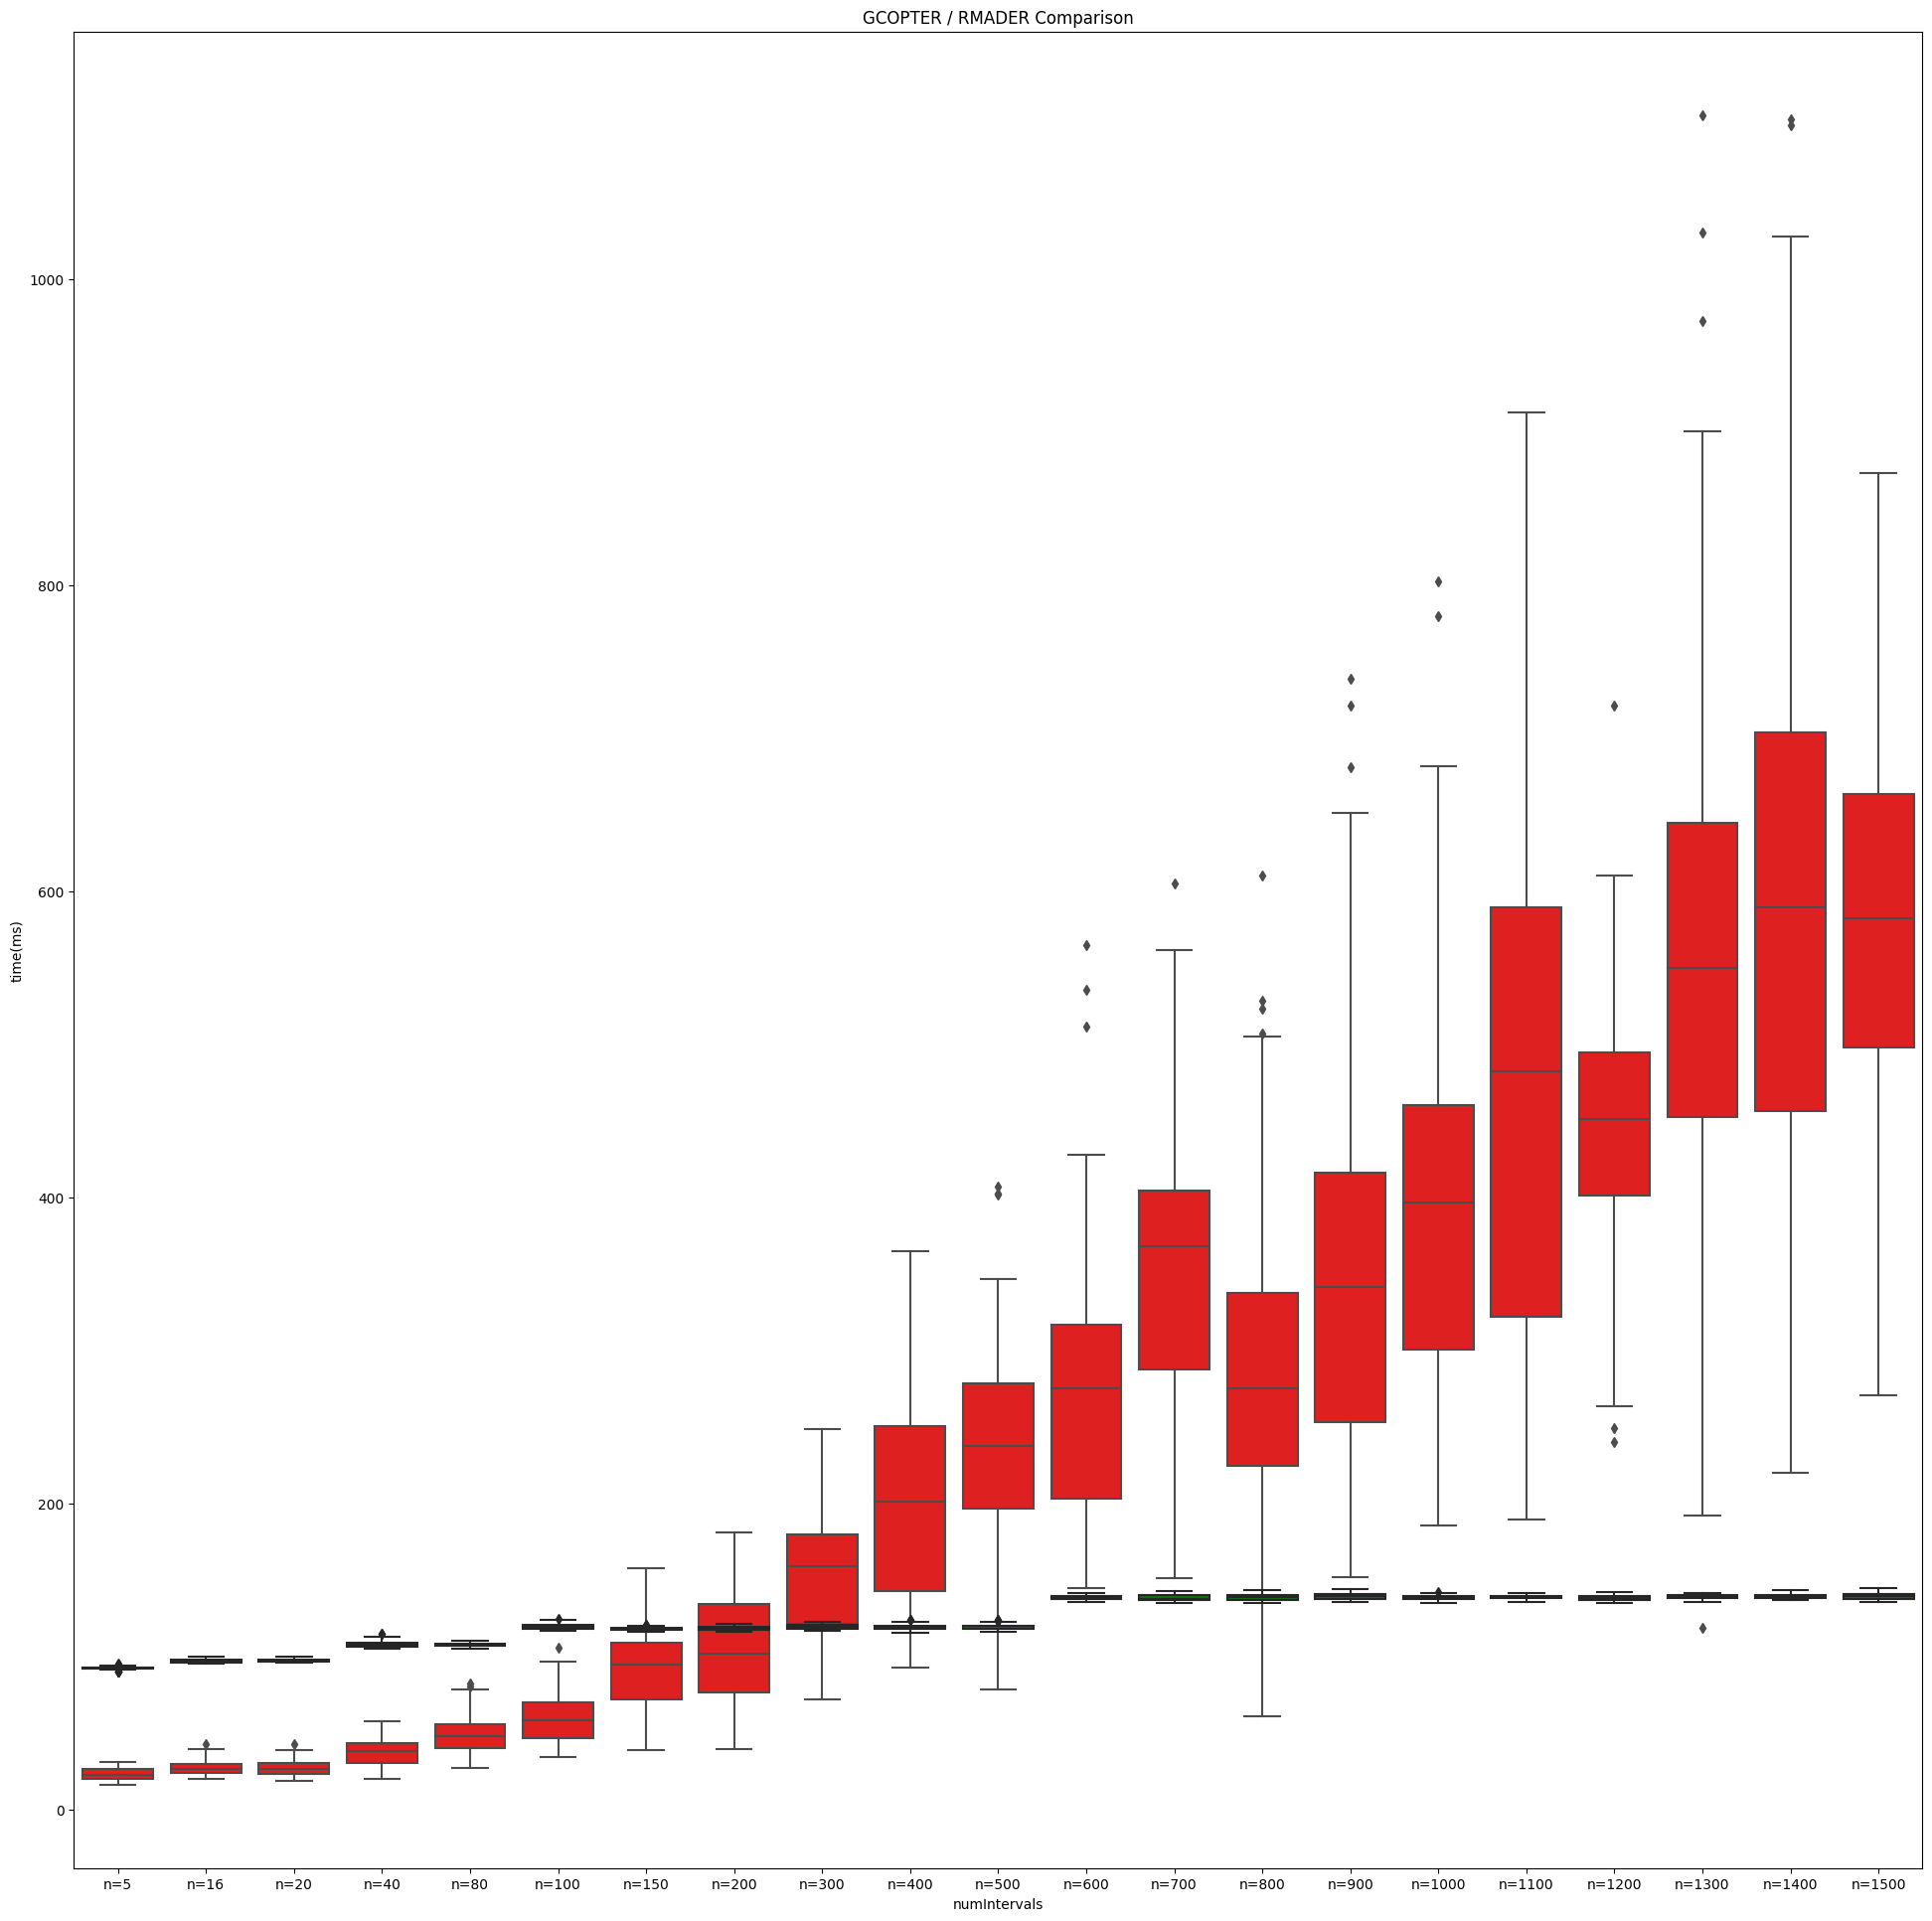

In [79]:
# full
ax = plt.subplots(figsize=(24,24))
ax = sns.boxplot(data=gcopterdf_noOutlier, color="red").set(title="GCOPTER / RMADER Comparison", ylabel="time(ms)", xlabel="numIntervals")
ax = sns.boxplot(data=rmaderdf_noOutlier, color="green")


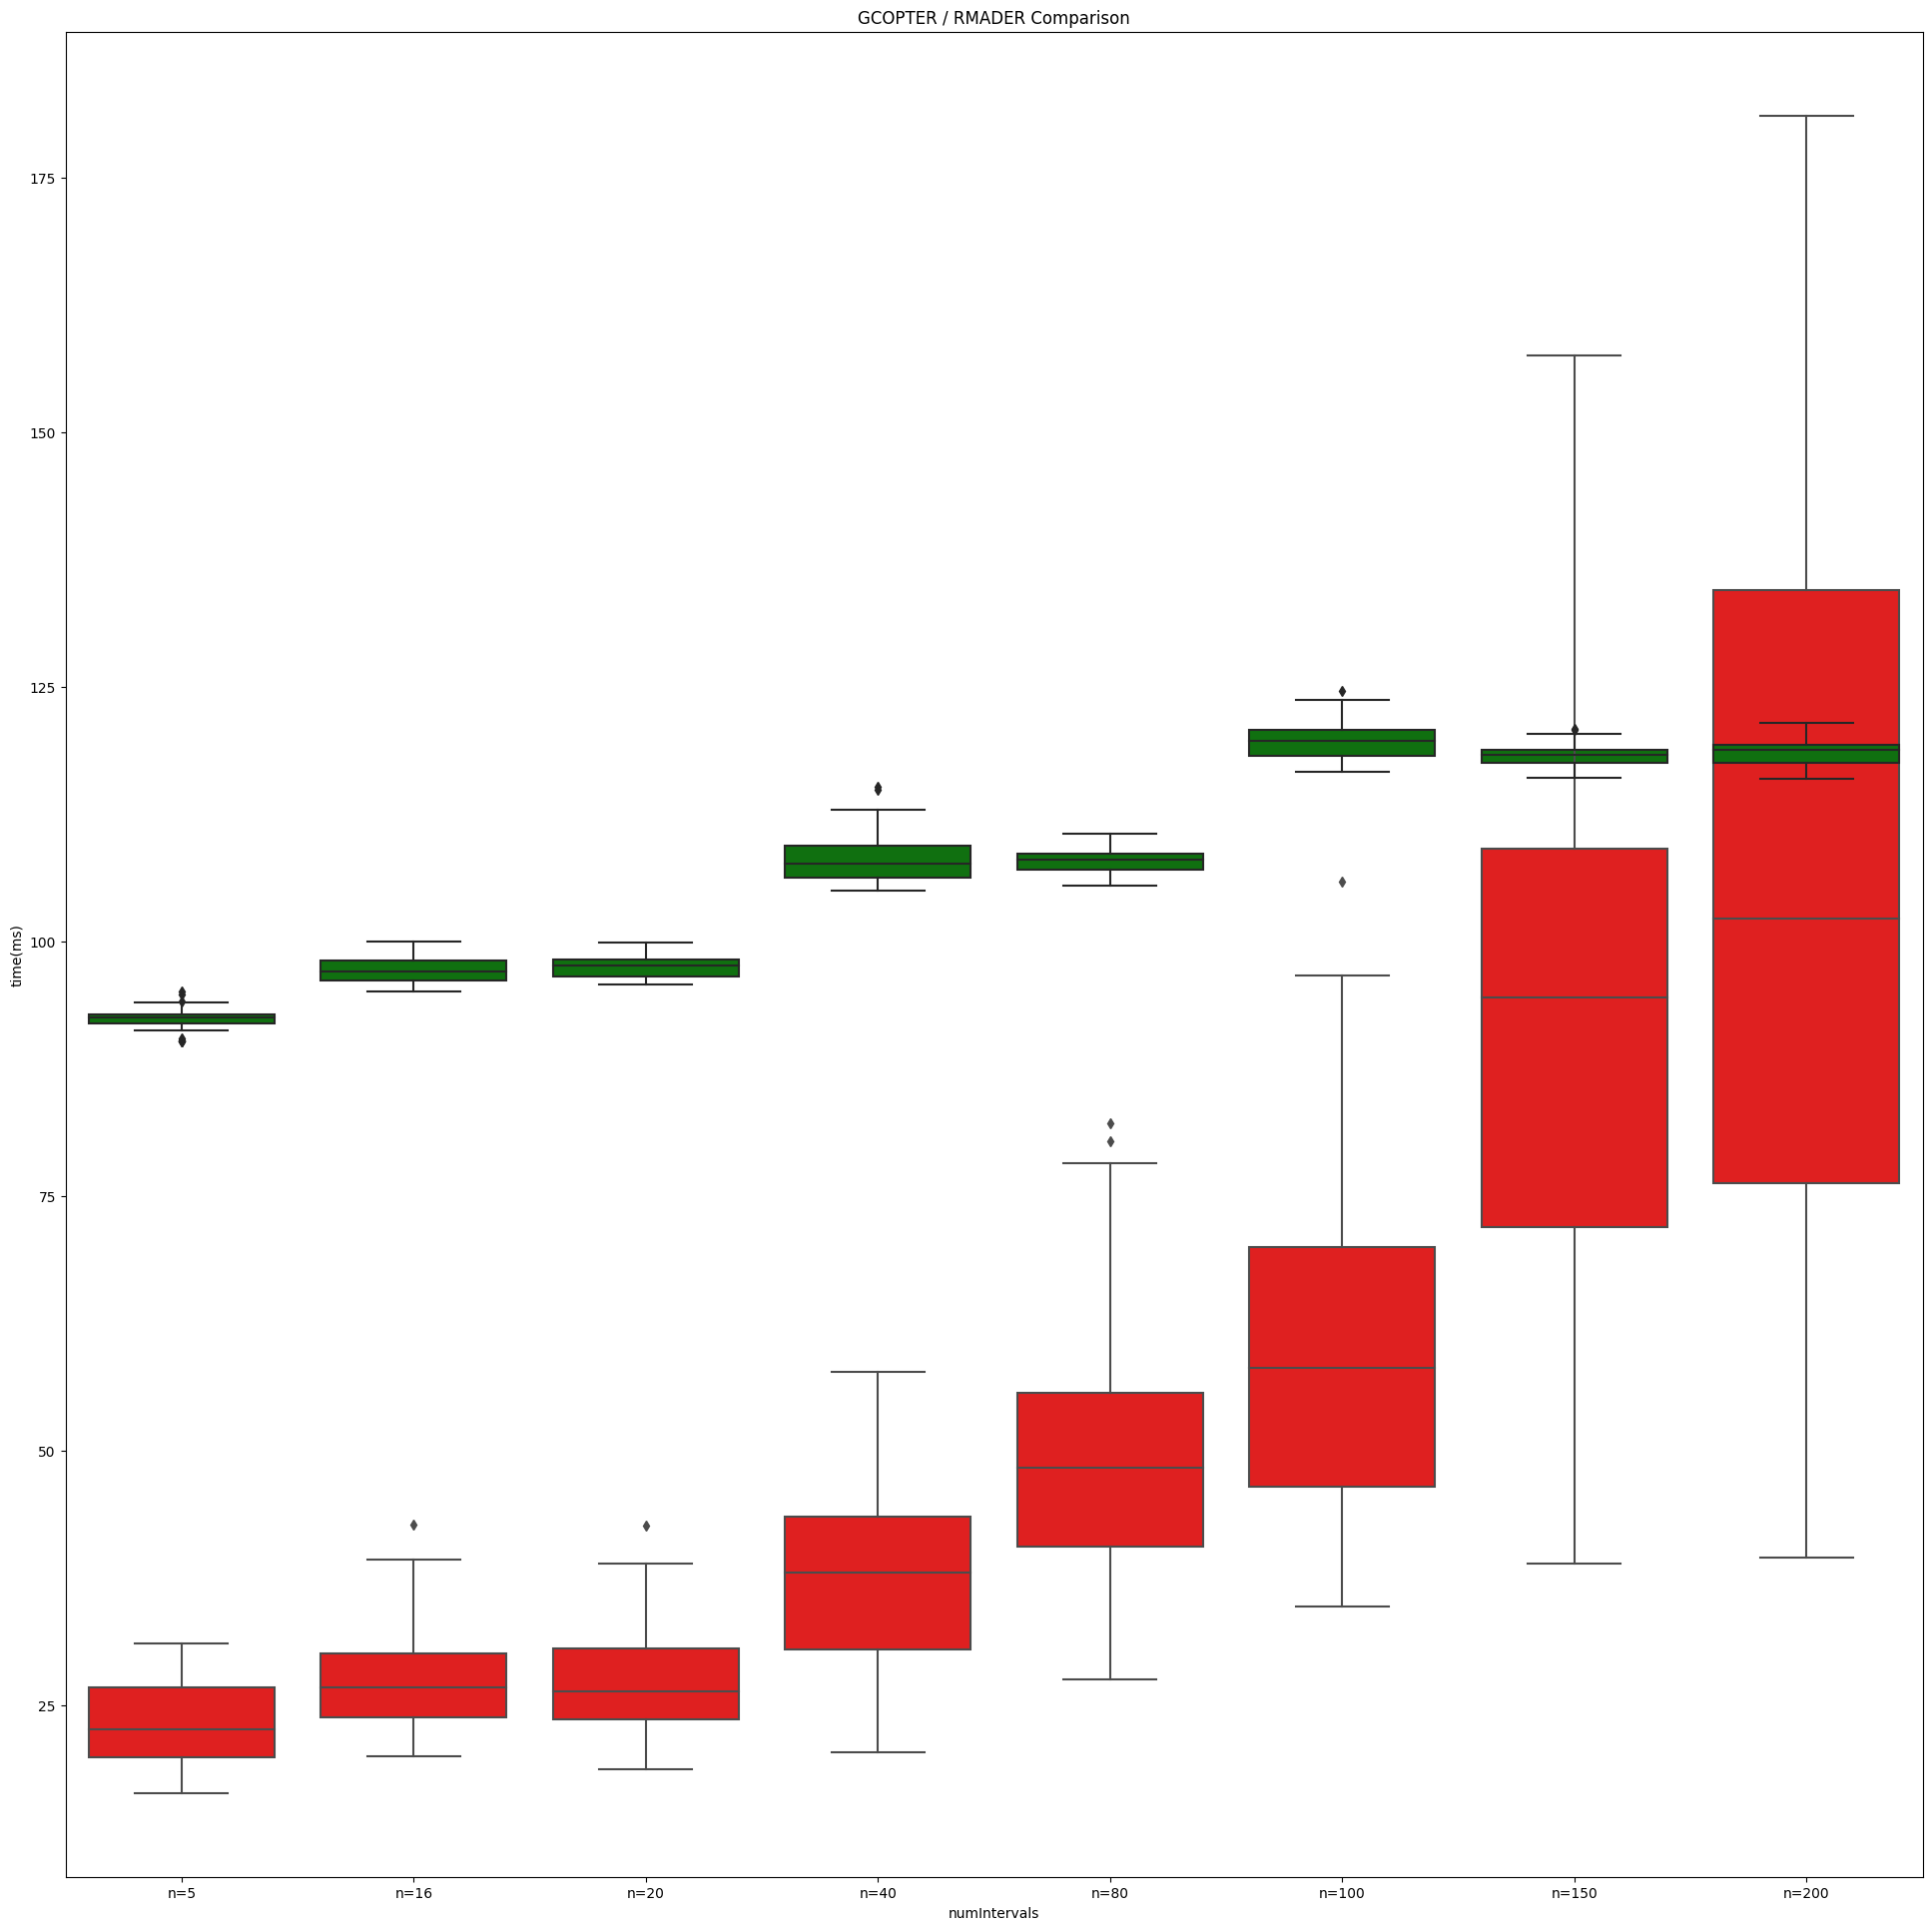

In [78]:
# up till 200 intervals
ax = plt.subplots(figsize=(24,24))
ax = sns.boxplot(data=gcopterdf_noOutlier.iloc[:,0:8], color="red").set(title="GCOPTER / RMADER Comparison", ylabel="time(ms)", xlabel="numIntervals")
ax = sns.boxplot(data=rmaderdf_noOutlier.iloc[:,0:8], color="green")